In [61]:
#Our Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [2]:
#Our Player Data
data = pd.read_csv('C:/Users/user pc/Downloads/Player injury pred/injury_data.csv')
data.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [4]:
data.describe()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,28.231000,74.794351,179.750948,0.515000,0.490538,3.466000,0.50000
std,6.538378,9.892621,9.888921,0.500025,0.286184,1.701099,0.50025
min,18.000000,40.191912,145.285701,0.000000,0.000031,1.000000,0.00000
25%,22.000000,67.944028,173.036976,0.000000,0.241042,2.000000,0.00000
50%,28.000000,75.020569,180.034436,1.000000,0.483912,4.000000,0.50000
75%,34.000000,81.302956,186.557913,1.000000,0.730404,5.000000,1.00000
max,39.000000,104.650104,207.308672,1.000000,0.997749,6.000000,1.00000


In [6]:
data['Likelihood_of_Injury'].value_counts()

0    500
1    500
Name: Likelihood_of_Injury, dtype: int64

<Axes: xlabel='Likelihood_of_Injury', ylabel='count'>

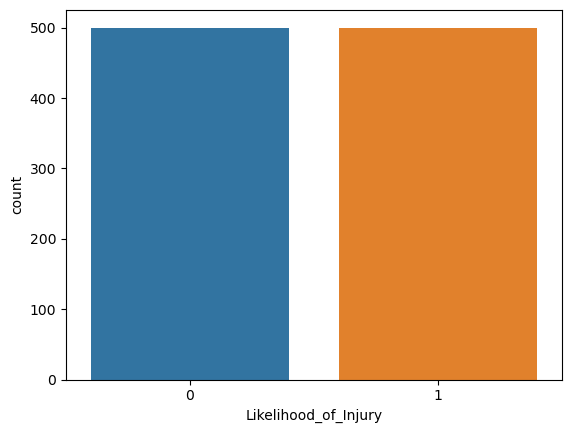

In [7]:
sns.countplot(x='Likelihood_of_Injury', data=data)

In [9]:
data['Training_Intensity'].value_counts()

0.457929    1
0.553472    1
0.879601    1
0.907042    1
0.991533    1
           ..
0.779821    1
0.118219    1
0.000031    1
0.712137    1
0.168810    1
Name: Training_Intensity, Length: 1000, dtype: int64

<Axes: >

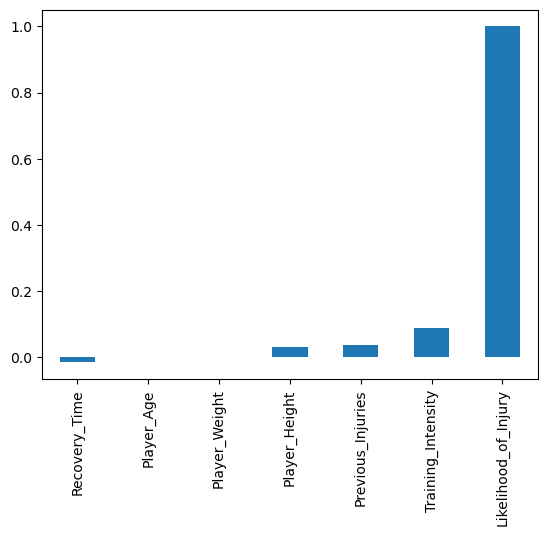

In [17]:
data.corr()['Likelihood_of_Injury'].sort_values().plot(kind='bar')

In [18]:
data.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


<Figure size 2000x800 with 0 Axes>

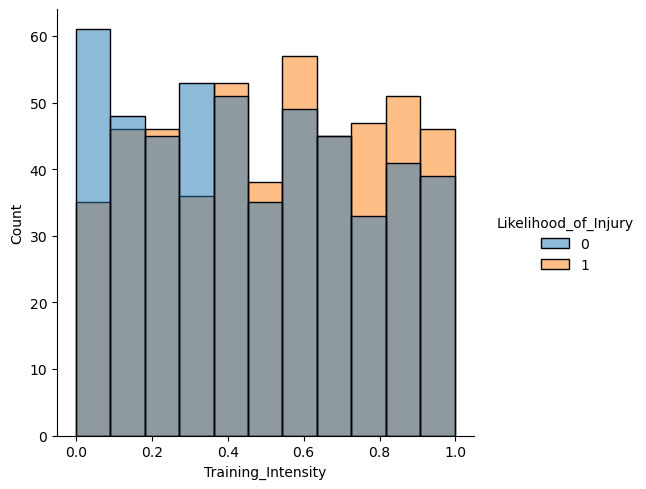

In [39]:
plt.figure(figsize=(20,8))
sns.displot(x='Training_Intensity', data=data, 
            hue='Likelihood_of_Injury')

<Axes: xlabel='Previous_Injuries', ylabel='count'>

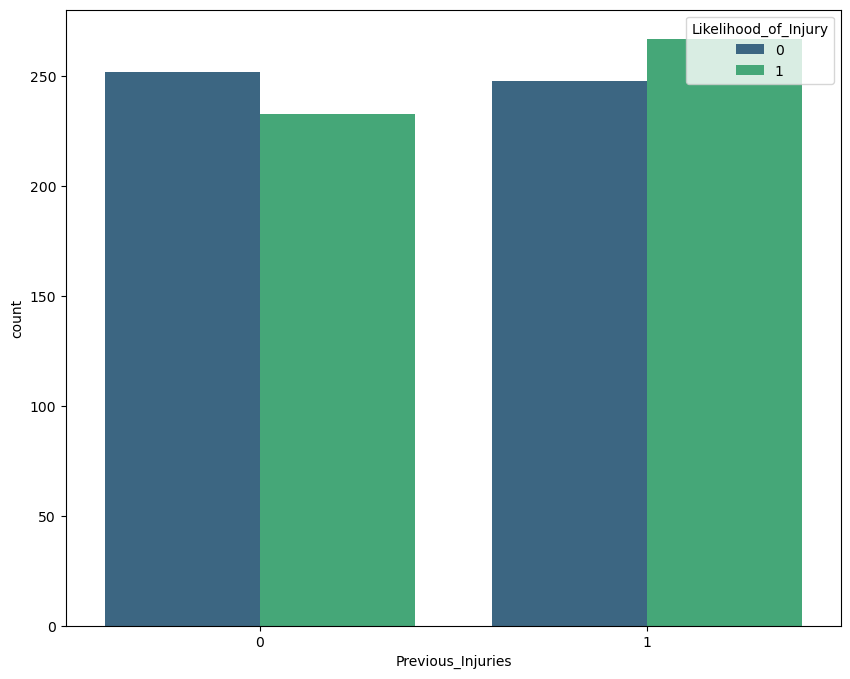

In [41]:
plt.figure(figsize=(10,8))
sns.countplot(x='Previous_Injuries', data=data, hue='Likelihood_of_Injury', palette='viridis')

<Figure size 800x800 with 0 Axes>

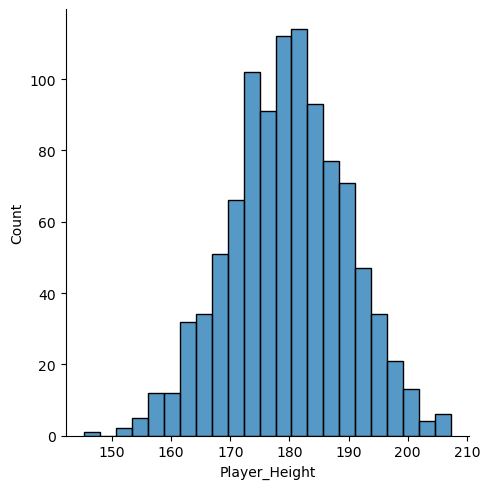

In [47]:
sns.displot(x='Player_Height',data=data)

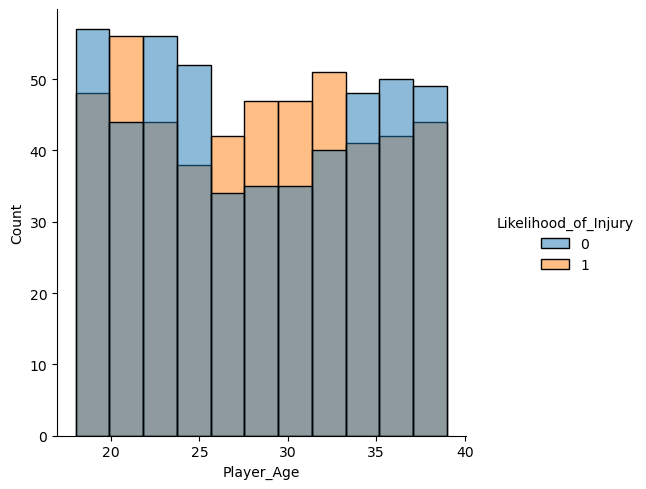

In [49]:
sns.displot(x='Player_Age',data=data, hue='Likelihood_of_Injury')

Data PreProcessing

In [50]:
data.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [75]:
#Splitting our data 
X = data.drop(['Likelihood_of_Injury','Recovery_Time'], axis=1)
y = data['Likelihood_of_Injury']

In [76]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [77]:
#Scali
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
#Our model
model = LogisticRegression()

In [79]:
model.fit(X_train,y_train)

LogisticRegression()

In [80]:
#our model evaluation
train_pred = model.predict(X_train)

test_pred = model.predict(X_test)


In [81]:
#Model accuracy
print(f'Our model training-prediction accuracy is {accuracy_score(train_pred,y_train) * 100:.2f}%')
print(f'Our model training-prediction accuracy is {accuracy_score(test_pred,y_test) * 100:.2f}%')

Our model training-prediction accuracy is 55.67%
Our model training-prediction accuracy is 49.09%


In [82]:
#metrics
print(classification_report(test_pred, y_test))
print(confusion_matrix(test_pred, y_test))

              precision    recall  f1-score   support

           0       0.44      0.50      0.47       148
           1       0.54      0.48      0.51       182

    accuracy                           0.49       330
   macro avg       0.49      0.49      0.49       330
weighted avg       0.50      0.49      0.49       330

[[74 74]
 [94 88]]
